# BASIC NLTK DEMO
In this demo, we will show you some basic functions that NLTK provides.

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

NLTK comes with many *corpora*, which are basically the datasets of NLP like spreadsheets are the datasets for financial ML. A corporus is just a huge file containing some text.

For example, there is a corporus containing all stop words in English, which will often times be useful when working with large samples of text, because those words don't really have much of an effect on the overall semantics of an article.

In [100]:
# Get some text
from nltk.corpus import gutenberg
text = gutenberg.raw('shakespeare-macbeth.txt')

# Example 1 - Basics
Doing some basic text manipulation on Shakespeare text.

First step: remove all of those meaningless stopwords and punctuations (cleaning the dataset).

In [101]:
from nltk.corpus import stopwords as sw
from string import punctuation
from nltk.tokenize import *

stopwords = sw.words('english')

# Given tokens `t`, return `t` without any stopwords.
def remove_stopwords(t):
   return [w for w in t if not w in stopwords]

# Given tokens `t`, return `t` without any punctuation.
def remove_punctuation(t):
   return [w for w in t if not w in punctuation]

tokens = word_tokenize(text) # Tokenize the words
tokens = remove_stopwords(tokens) # Remove the stopwords
tokens = remove_punctuation(tokens) # Remove the punctuation

## Exploratory data analysis
Find the most common words and plot them in a graph like this.

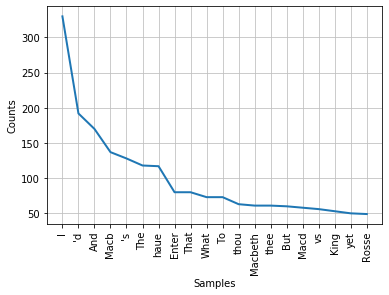

In [102]:
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

# Example 2 - Grammar Parsing
Here we will use NLTK to truly parse some text, not just tokenize it. This is useful for getting an understanding of the grammar of the sentence, which is an important step towards understanding the semantics.

## Setup the parsing server
Basically, run some code that sets up the code to be able to parse sentences.

In [3]:
import os
from nltk.parse.corenlp import CoreNLPParser, CoreNLPServer

# Init the server
JAR_PATH = os.path.join('stanford-corenlp-latest', 'stanford-corenlp-4.0.0')
server = CoreNLPServer(
   os.path.join(JAR_PATH, "stanford-corenlp-4.0.0.jar"),
   os.path.join(JAR_PATH, "stanford-corenlp-4.0.0-models.jar"),    
)

# Start the server
server.start()

CoreNLPServerError: Could not connect to the server.

## Parsing the grammar
Now comes the code to actually use this language server and parse some arbitrary sentences with it. You could also run this code from the command line (probably something like `java -jar stanford-corenlp.jar` would do the trick), but its more convenient to just do it all in the notebook.

In [4]:
# Make some sentences
sents = [
    'The student sat next to his friend in the classroom.',
    'I opened the oven to get my food.',
    'Machine Learning is a subset of Artificial Intelligence.',
]

# Parse the grammar of some sentences
for sent in sents:
    parser = CoreNLPParser() # Initialize the parser
    grammar = next(parser.raw_parse(sent)) # Parse the sentence
    
    # Display the parsing
    print(sent) # Print the sentence
    print(grammar, end='\n\n') # Print the grammar
    
    # Show the grammar tree
    grammar.draw()

The student sat next to his friend in the classroom.
(ROOT
  (S
    (NP (DT The) (NN student))
    (VP
      (VBD sat)
      (ADVP (RB next))
      (PP (IN to) (NP (PRP$ his) (NN friend)))
      (PP (IN in) (NP (DT the) (NN classroom))))
    (. .)))

I opened the oven to get my food.
(ROOT
  (S
    (NP (PRP I))
    (VP
      (VBD opened)
      (NP (DT the) (NN oven))
      (S (VP (TO to) (VP (VB get) (NP (PRP$ my) (NN food))))))
    (. .)))

Machine Learning is a subset of Artificial Intelligence.
(ROOT
  (S
    (NP (NN Machine) (NN Learning))
    (VP
      (VBZ is)
      (NP
        (NP (DT a) (NN subset))
        (PP (IN of) (NP (NNP Artificial) (NNP Intelligence)))))
    (. .)))

